In [30]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib notebook

In [31]:
np.random.seed = 2021
iris = load_iris()
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] = y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [32]:
#test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle= True)
print(f'X_train.shape = {X_train.shape[0]}, y_train.shape = {y_train.shape[0]}')
print(f'X_test.shape = {X_test.shape[0]}, y_test.shape = {y_test.shape[0]}')

X_train.shape = 112, y_train.shape = 112
X_test.shape = 38, y_test.shape = 38


In [33]:
#scale
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)    
X_test = scaler.transform(X_test)
print(X_train[0:5])

[[ 0.01543995 -0.11925475  0.22512685  0.35579762]
 [-0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.05300481 -0.11925475  0.95031423  1.12707506]
 [-1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.1682898   0.11103029  0.72717965  1.38416753]]


In [34]:
#finding the best k
q_rate=[]
for i in range (1, 26):
    knn_temp = KNeighborsClassifier(n_neighbors=i)
    knn_temp.fit(X_train, y_train)
    predict_i = knn_temp.predict(X_test)
    q_rate.append(np.mean(predict_i != y_test))

<IPython.core.display.Javascript object>


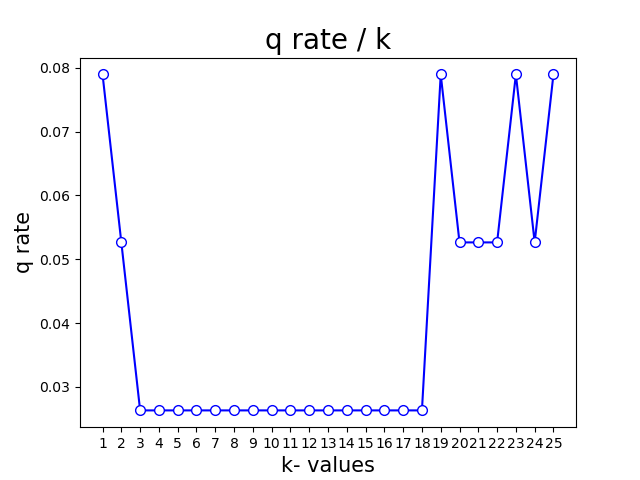

In [35]:
#plotting k 
plt.figure()
plt.plot(range(1,26), q_rate, marker="o", markerfacecolor="w", color="blue", markersize=7)
plt.title("q rate / k",fontsize=20)
plt.xlabel("k- values",fontsize=15)
plt.ylabel("q rate",fontsize=15)
plt.xticks(range(1,26))
plt.show()

In [36]:
#classifier
k_best = 3
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_train, y_train)
score_best = knn.score(X_test, y_test)
print (f'The best k = {k_best} , score = {score_best}')

The best k = 3 , score = 0.9736842105263158


In [37]:
#testing
iris_dict = dict(zip(df_iris['label'].unique(), df_iris['label_names'].unique()))
print(iris_dict)
pred1 = knn.predict(X_test[0:10])
print(pred1)
print(iris_dict[pred1[0]])
print(iris_dict[pred1[4]])

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
[2 1 0 2 0 2 0 1 1 1]
virginica
setosa


<IPython.core.display.Javascript object>


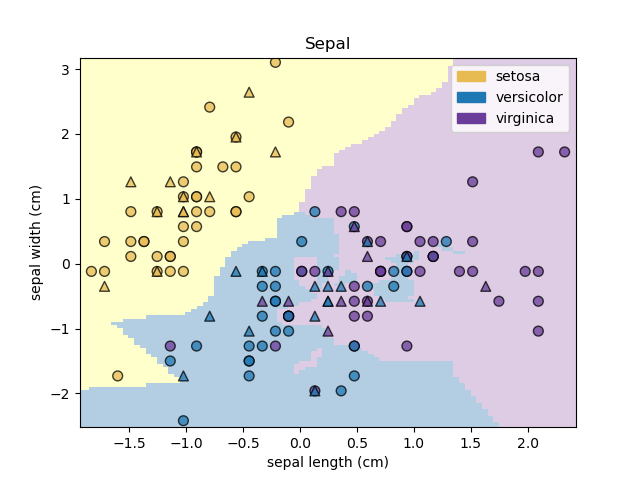

In [38]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50):
    colors_for_areas= [mpl.cm.Pastel1(.6), mpl.cm.Pastel1(.2),  mpl.cm.Pastel1(.4)]
    colors_for_points = [mpl.cm.tab20b(.5), mpl.cm.Paired(.1), mpl.cm.Paired(.8)]
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold  = ListedColormap(colors_for_points)

    mesh_step_size = precision

    X= np.concatenate([X_train, X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    Z = clf.predict(target_samples_grid)
    Z = Z.reshape(xx1.shape)
    
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    patch0 = mpatches.Patch(color=colors_for_points[0], label='setosa')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='versicolor')
    patch2 = mpatches.Patch(color=colors_for_points[2], label='virginica')
    plt.legend(handles=[patch0, patch1, patch2])
    plt.title(title)

    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')

    plt.show()
    
X_train_short, X_test_short = X_train[:, :2], X_test[:, :2]
knn_plot = KNeighborsClassifier(n_neighbors = k_best)
knn_plot.fit(X_train_short, y_train)
plot_decision_boundary(knn_plot, X_train_short, y_train, X_test_short, y_test, "Sepal")